[1] 缺失值检查:
训练集缺失: 0
测试集缺失: 0

[2] 训练集评估结果：
MAE: 0.38 | MSE: 0.30 | RMSE: 0.55 | R²: 0.6733

[2] 测试集评估结果：
MAE: 0.48 | MSE: 0.65 | RMSE: 0.81 | R²: 0.5120


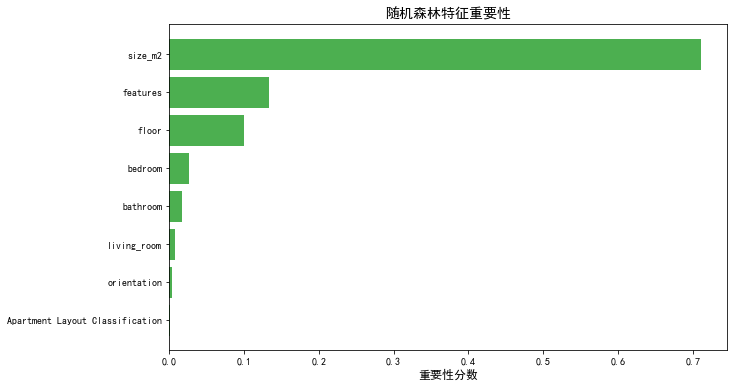

In [1]:
# 随机森林回归模型
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# 设置字体和负号显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 1. 加载数据集（假设文件路径正确）
X_train = pd.read_csv('train_features.csv')
y_train = pd.read_csv('train_target.csv')
X_test = pd.read_csv('test_features.csv')
y_test = pd.read_csv('test_target.csv')

# 2. 检查并处理缺失值
print("[1] 缺失值检查:")
print("训练集缺失:", X_train.isnull().sum().sum())
print("测试集缺失:", X_test.isnull().sum().sum())

# 如果有缺失值，使用中位数填充
if X_train.isnull().sum().sum() > 0 or X_test.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='median')
    X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# 3. 创建并训练随机森林回归模型（优化参数）
rf_model = RandomForestRegressor(
    n_estimators=200,  # 增加树的数量
    max_depth=10,      # 放宽树的最大深度
    min_samples_split=5,  # 调整节点最小分裂样本数
    min_samples_leaf=2,   # 调整叶节点最小样本数
    random_state=42,
    oob_score=True
)

rf_model.fit(X_train, y_train.values.ravel())  # 转换y为一维数组

# 4. 模型预测
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# 5. 模型评估
def evaluate_model(y_true, y_pred, set_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n[2] {set_name}评估结果：")
    print(f"MAE: {mae:.2f} | MSE: {mse:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")

evaluate_model(y_train, y_train_pred, "训练集")
evaluate_model(y_test, y_test_pred, "测试集")

# 6. 特征重要性分析
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#4CAF50')
plt.title('随机森林特征重要性', fontsize=14)
plt.xlabel('重要性分数', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

[1] 缺失值检查:
训练集缺失: 0
测试集缺失: 0

[2] 训练集评估结果：
MAE: 0.52 | MSE: 0.61 | RMSE: 0.78 | R²: 0.3330

[2] 测试集评估结果：
MAE: 0.56 | MSE: 0.93 | RMSE: 0.97 | R²: 0.3033


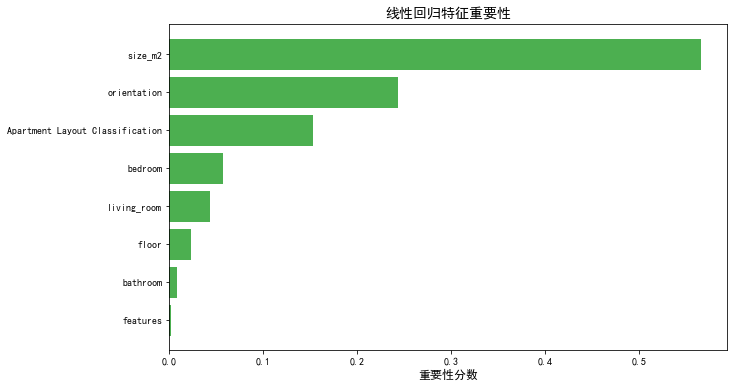

In [2]:
# 线性回归模型
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression  # 线性回归模型
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# 设置字体和负号显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 1. 加载数据集（假设文件路径正确）
X_train = pd.read_csv('train_features.csv')
y_train = pd.read_csv('train_target.csv')
X_test = pd.read_csv('test_features.csv')
y_test = pd.read_csv('test_target.csv')

# 2. 检查并处理缺失值
print("[1] 缺失值检查:")
print("训练集缺失:", X_train.isnull().sum().sum())
print("测试集缺失:", X_test.isnull().sum().sum())

# 如果有缺失值，使用中位数填充
if X_train.isnull().sum().sum() > 0 or X_test.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='median')
    X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# 3. 创建并训练线性回归模型
lr_model = LinearRegression()

lr_model.fit(X_train, y_train.values.ravel())  # 转换y为一维数组

# 4. 模型预测
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# 5. 模型评估
def evaluate_model(y_true, y_pred, set_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n[2] {set_name}评估结果：")
    print(f"MAE: {mae:.2f} | MSE: {mse:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")

evaluate_model(y_train, y_train_pred, "训练集")
evaluate_model(y_test, y_test_pred, "测试集")

# 6. 特征重要性分析（线性回归的系数）
# 线性回归没有特征重要性属性，但可以使用系数的绝对值作为特征重要性的指标
coefficients = lr_model.coef_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#4CAF50')
plt.title('线性回归特征重要性', fontsize=14)
plt.xlabel('重要性分数', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

[1] 缺失值检查:
训练集缺失: 0
测试集缺失: 0

[2] 训练集评估结果：
MAE: 0.47 | MSE: 0.49 | RMSE: 0.70 | R²: 0.4661

[2] 测试集评估结果：
MAE: 0.52 | MSE: 0.67 | RMSE: 0.82 | R²: 0.4960


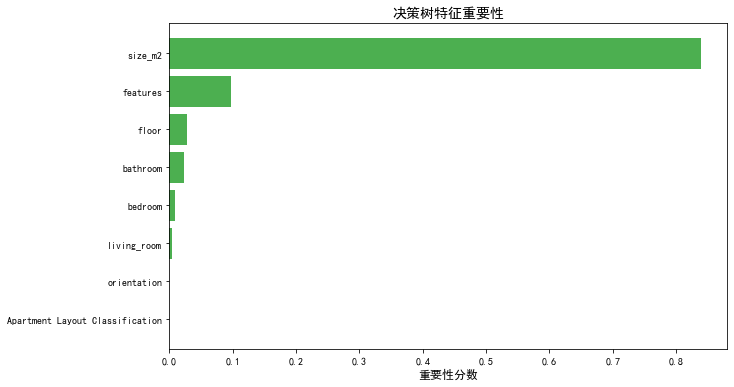

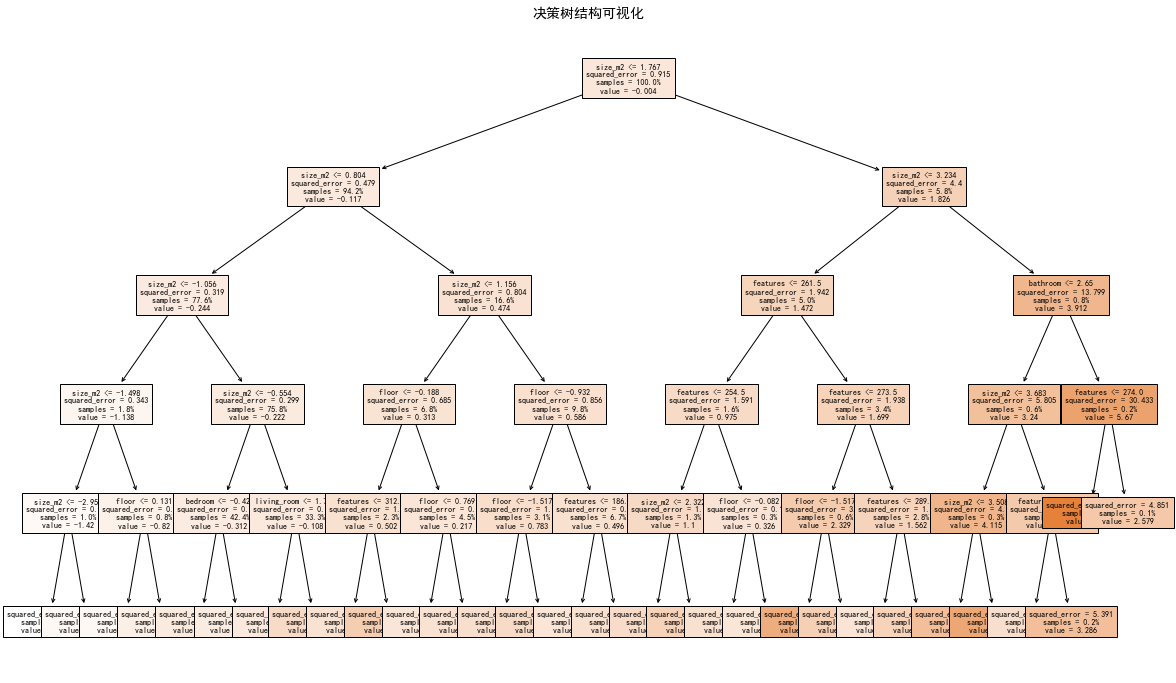

In [3]:
# 决策树回归模型
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree  # 新增决策树可视化
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  # 缺失值处理
import matplotlib.pyplot as plt


plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 1. 加载数据集（假设文件路径正确）
X_train = pd.read_csv('train_features.csv')
y_train = pd.read_csv('train_target.csv')
X_test = pd.read_csv('test_features.csv')
y_test = pd.read_csv('test_target.csv')

# 2. 检查并处理缺失值（决策树本身不支持缺失值）
print("[1] 缺失值检查:")
print("训练集缺失:", X_train.isnull().sum().sum())
print("测试集缺失:", X_test.isnull().sum().sum())

# 如果有缺失值，使用中位数填充
if X_train.isnull().sum().sum() > 0 or X_test.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='median')
    X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# 3. 创建并训练决策树回归模型
dt_model = DecisionTreeRegressor(
    max_depth=5,               # 限制树深度防止过拟合
    min_samples_split=10,      # 节点最小分裂样本数
    min_samples_leaf=5,        # 叶节点最小样本数
    random_state=42            # 固定随机种子
)

dt_model.fit(X_train, y_train.values.ravel())  # 转换y为一维数组

# 4. 模型预测
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# 5. 模型评估（与随机森林相同的评估指标）
def evaluate_model(y_true, y_pred, set_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n[2] {set_name}评估结果：")
    print(f"MAE: {mae:.2f} | MSE: {mse:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")

evaluate_model(y_train, y_train_pred, "训练集")
evaluate_model(y_test, y_test_pred, "测试集")

# 6. 特征重要性分析（与随机森林接口一致）
feature_importance = dt_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#4CAF50')
plt.title('决策树特征重要性', fontsize=14)
plt.xlabel('重要性分数', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

# 7. 决策树结构可视化（新增核心差异点）
plt.figure(figsize=(20,12))
plot_tree(
    dt_model, 
    feature_names=X_train.columns, 
    filled=True, 
    proportion=True, 
    fontsize=8
)
plt.title('决策树结构可视化', fontsize=14)
plt.show()

[1] 缺失值检查:
训练集缺失: 0
测试集缺失: 0
[2] 降维后特征数: 7 (原始: 8)

[3] 训练集评估结果：
MAE: 0.46 | MSE: 0.59 | RMSE: 0.77 | R²: 0.3606

[3] 测试集评估结果：
MAE: 0.53 | MSE: 0.99 | RMSE: 0.99 | R²: 0.2610

[4] 计算特征重要性...


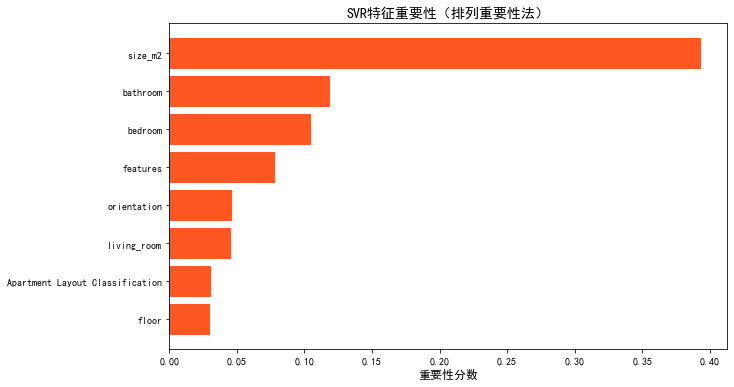


[5] 支持向量数量: 4673 (占总样本的84.2%)


In [4]:
# 支持向量回归模型
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance  # 特征重要性分析
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 1. 加载数据集
X_train = pd.read_csv('train_features.csv')
y_train = pd.read_csv('train_target.csv').values.ravel()  # 转换为一维数组
X_test = pd.read_csv('test_features.csv')
y_test = pd.read_csv('test_target.csv').values.ravel()

# 2. 缺失值处理（与随机森林相同逻辑）
print("[1] 缺失值检查:")
print("训练集缺失:", X_train.isnull().sum().sum())
print("测试集缺失:", X_test.isnull().sum().sum())

if X_train.isnull().sum().sum() > 0 or X_test.isnull().sum().sum() > 0:
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# 3. 特征工程：标准化 + PCA降维（应对高计算复杂度）
scaler = StandardScaler()
pca = PCA(n_components=0.95)  # 保留95%方差

X_train_scaled = scaler.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

print(f"[2] 降维后特征数: {pca.n_components_} (原始: {X_train.shape[1]})")

# 4. 创建并训练SVR模型
svr_model = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.95),  # 可调整或删除
    SVR(
        kernel='rbf',          # 选择RBF核处理非线性
        C=1.0,                 # 正则化参数
        gamma='scale',         # 核函数系数
        epsilon=0.1            # 控制对异常值的敏感度
    )
)


svr_model.fit(X_train, y_train)

# 5. 模型预测
y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)

# 6. 评估指标（复用原有函数）
def evaluate_model(y_true, y_pred, set_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n[3] {set_name}评估结果：")
    print(f"MAE: {mae:.2f} | MSE: {mse:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")

evaluate_model(y_train, y_train_pred, "训练集")
evaluate_model(y_test, y_test_pred, "测试集")

# 7. 特征重要性分析（替代随机森林的方法）
# 使用排列重要性(耗时较长)
print("\n[4] 计算特征重要性...")
result = permutation_importance(
    svr_model, X_train, y_train, 
    n_repeats=10, 
    random_state=42
)

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

# 可视化
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#FF5722')
plt.title('SVR特征重要性（排列重要性法）', fontsize=14)
plt.xlabel('重要性分数', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

# 8. 支持向量可视化（可选）
# 获取支持向量索引
support_vectors = svr_model.named_steps['svr'].support_
print(f"\n[5] 支持向量数量: {len(support_vectors)} (占总样本的{len(support_vectors)/len(X_train):.1%})")

[1] 缺失值检查:
训练集缺失: 0
测试集缺失: 0

[2] 训练集评估结果：
MAE: 0.33 | MSE: 0.20 | RMSE: 0.45 | R²: 0.7783

[2] 测试集评估结果：
MAE: 0.48 | MSE: 0.60 | RMSE: 0.77 | R²: 0.5528

[3] 特征重要性排名：
                           Feature  Importance
0                          size_m2    0.686289
1                         features    0.157669
3                            floor    0.102529
4                          bedroom    0.027674
6                         bathroom    0.015295
5                      living_room    0.006811
2                      orientation    0.003033
7  Apartment Layout Classification    0.000701


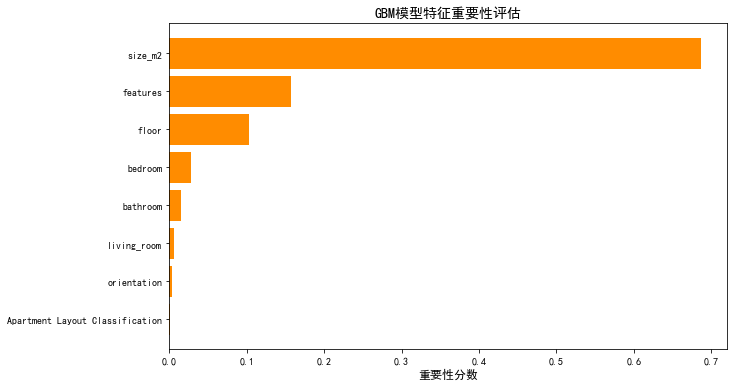

In [5]:
# 梯度提升机模型
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# 设置字体和负号显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False

# -------------------------------
# 1. 加载数据集
# -------------------------------
X_train = pd.read_csv('train_features.csv')
y_train = pd.read_csv('train_target.csv')
X_test = pd.read_csv('test_features.csv')
y_test = pd.read_csv('test_target.csv')

# -------------------------------
# 2. 缺失值处理
# -------------------------------
print("[1] 缺失值检查:")
print("训练集缺失:", X_train.isnull().sum().sum())
print("测试集缺失:", X_test.isnull().sum().sum())

# 如果有缺失值，用中位数填充
if X_train.isnull().sum().sum() > 0 or X_test.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='median')
    X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# -------------------------------
# 3. 初始GBM模型训练
# -------------------------------
gbm_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

gbm_model.fit(X_train, y_train.values.ravel())

# 初始预测
y_train_pred = gbm_model.predict(X_train)
y_test_pred = gbm_model.predict(X_test)

# -------------------------------
# 4. 初始模型评估
# -------------------------------
def evaluate_model(y_true, y_pred, set_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n[2] {set_name}评估结果：")
    print(f"MAE: {mae:.2f} | MSE: {mse:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")

evaluate_model(y_train, y_train_pred, "训练集")
evaluate_model(y_test, y_test_pred, "测试集")

initial_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# -------------------------------
# 4.8.1 特征重要性评估
# -------------------------------
feature_importance = gbm_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\n[3] 特征重要性排名：")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='#FF8C00')
plt.title('GBM模型特征重要性评估', fontsize=14)
plt.xlabel('重要性分数', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=

[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5

[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, max_dep

[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=7

[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_

[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3

[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.05, max

[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5

[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.05, max

[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=7

[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_

[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_sam

[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=5, min_sam

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_sa

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, min_sa

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=7, min_sam

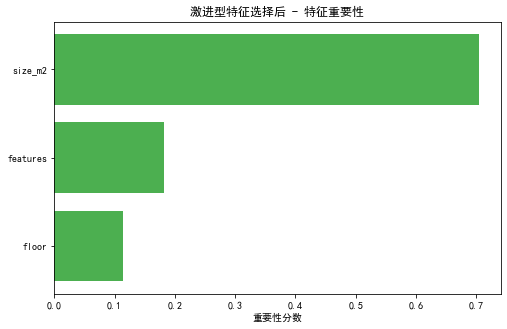

In [4]:
# 模型优化——梯度提升机hui'g
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 激进型特征选择，仅保留最重要的3个特征
best_features = ['size_m2', 'features', 'floor']

# 2. 重建训练集和测试集
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]

# 3. 定义超参数搜索空间
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 4. 初始化模型
gbm = GradientBoostingRegressor(random_state=42)

# 5. 使用 GridSearchCV 进行超参数搜索
grid_search = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=1,  # 只用一个进程，最保险
    verbose=2
)

# 6. 执行超参数搜索
grid_search.fit(X_train_selected, y_train.values.ravel())

# 7. 输出最佳超参数
print("最佳超参数组合：")
print(grid_search.best_params_)

# 8. 使用最佳参数训练最终模型
gbm_optimized = grid_search.best_estimator_

# 9. 模型预测
y_train_pred = gbm_optimized.predict(X_train_selected)
y_test_pred = gbm_optimized.predict(X_test_selected)

# 10. 模型评估函数
def evaluate_model(y_true, y_pred, set_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n[{set_name} 评估结果]")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

# 11. 打印评估结果
evaluate_model(y_train, y_train_pred, "训练集")
evaluate_model(y_test, y_test_pred, "测试集")

# 12. 可视化特征重要性（新模型）
feature_importance = gbm_optimized.feature_importances_
importance_df = pd.DataFrame({
    'Feature': best_features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#4CAF50')
plt.title('激进型特征选择后 - 特征重要性')
plt.xlabel('重要性分数')
plt.gca().invert_yaxis()
plt.show()
